In [9]:
import pandas as pd

import numpy as np

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel



from xgboost import plot_importance

from matplotlib import pyplot

import os
import time
from datetime  import datetime


#>acc=0.910, est=0.851, cfg={'learning_rate': 0.01, 'n_estimators': 200}

#>acc=0.901, est=0.857, cfg={'learning_rate': 0.05, 'n_estimators': 100}

#>acc=0.925, est=0.842, cfg={'learning_rate': 0.01, 'n_estimators': 220}

In [10]:
n_tree=100
max_depth=8
learning_rate=0.05
model = XGBClassifier(max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_tree,importance_type='gain')
#model=GradientBoostingClassifier(max_depth=8,learning_rate=0.05,n_estimators=250)

In [11]:

pahtname=r'D:\DataSets\ML_LS\ML-Long_S50M15_07To2Q20-Train_Norm.csv'
#pahtname=r'D:\DataSets\ML_LS\ML-Long_S50M15_07To2Q20-Train.csv'

filepath= os.path.abspath(pahtname)

dataset =pd.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
dataset.drop(columns=['open','high','low','close'],inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70896 entries, 2007-01-03 09:45:00 to 2020-06-30 16:45:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             70896 non-null  float64
 1   indy_ma-1100            70896 non-null  float64
 2   indy_hh-550             70896 non-null  float64
 3   indy_ll-550             70896 non-null  float64
 4   indy_mid-550            70896 non-null  float64
 5   indy_hh2-1100           70896 non-null  float64
 6   indy_ll2-1100           70896 non-null  float64
 7   indy_mid2-1100          70896 non-null  float64
 8   indy_macd110-440        70896 non-null  float64
 9   indy_signal110-440-110  70896 non-null  float64
 10  indy_hist_macd110-440   70896 non-null  float64
 11  indy_rsi25-ma20         70896 non-null  float64
 12  indy_6ATRTrail_DC-110   70896 non-null  float64
 13  cate_3trend-550_ma110   70896 non-null  int64  
 14  cat

In [12]:
def CreateData(dfx):
 labelCol=dfx.columns[len(dfx.columns)-1]
 
 X_df_temp = dfx.drop(columns=labelCol)
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

In [13]:

#My Train
st='01-2007'
ed='12-2020'
dfx=dataset[st:ed]
#df_train.info()
X_df,Y_df,X,y=CreateData( dfx)

print(X_df.info())
print("============================")
X_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70896 entries, 2007-01-03 09:45:00 to 2020-06-30 16:45:00
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             70896 non-null  float64
 1   indy_ma-1100            70896 non-null  float64
 2   indy_hh-550             70896 non-null  float64
 3   indy_ll-550             70896 non-null  float64
 4   indy_mid-550            70896 non-null  float64
 5   indy_hh2-1100           70896 non-null  float64
 6   indy_ll2-1100           70896 non-null  float64
 7   indy_mid2-1100          70896 non-null  float64
 8   indy_macd110-440        70896 non-null  float64
 9   indy_signal110-440-110  70896 non-null  float64
 10  indy_hist_macd110-440   70896 non-null  float64
 11  indy_rsi25-ma20         70896 non-null  float64
 12  indy_6ATRTrail_DC-110   70896 non-null  float64
 13  cate_3trend-550_ma110   70896 non-null  int64  
 14  cat

,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2020-06-30 16:15:00,1.03,1.0,1.11,0.97,0.0,1.11,0.90,0.0,-33.54,-23.34,-10.20,57.93,1.00,2,1,4,3
2020-06-30 16:30:00,1.04,1.0,1.11,0.98,0.0,1.11,0.91,0.0,-33.66,-23.54,-10.12,57.28,1.01,2,1,4,3
2020-06-30 16:45:00,1.04,1.0,1.12,0.98,0.0,1.12,0.91,0.0,-33.78,-23.74,-10.04,56.61,1.01,2,1,4,3


In [14]:
print(Y_df.tail(3))
print(X[:3])
print(y[:3])

datetime
2020-06-30 16:15:00    0
2020-06-30 16:30:00    0
2020-06-30 16:45:00    0
Name: LongSignal, dtype: int64
[[  1.1    1.11   1.15   0.91   0.     1.15   0.91   0.   -22.5  -27.2
    4.7   39.11   1.03   1.     0.     3.     2.  ]
 [  1.09   1.1    1.14   0.89   0.     1.14   0.89   0.   -22.5  -27.19
    4.68  39.05   1.02   1.     0.     3.     2.  ]
 [  1.09   1.11   1.15   0.9    0.     1.15   0.9    0.   -22.53 -27.17
    4.64  38.91   1.03   1.     0.     3.     2.  ]]
[0 0 0]


# n_estimators=epoch

# evaluate_validation_set

In [15]:
option=2

nsplit=3

# set shuffle is false owning to time series data
isShuffle=False  # if True  set random_state=xseed else None
if isShuffle==False:
    xseed=None
else:
    xseed=1990
    
if option==1 :
 kfold =  TimeSeriesSplit(n_splits=nsplit,max_train_size=None)
elif option==2:
 kfold = KFold(n_splits=nsplit, shuffle=isShuffle, random_state=xseed) 
else:
 kfold = StratifiedKFold(n_splits=nsplit, shuffle=isShuffle, random_state=xseed)

listresult=[]
listaccuracy=[]

In [16]:
t_Start=time.time()
print(datetime.now())

2020-08-16 00:25:47.789728


In [17]:
#evalMetric="logloss"
evalMetric="error"

early_stopping=round(n_tree/2,0)

show_verbose=False
print(early_stopping)
print(evalMetric)

50.0
error


In [18]:
#for train, test in kfold.split(X,y): # for  StratifiedKFold
cv_count=1
#for train, test in kfold.split(X,y):
for train, test in kfold.split(X):  
   X_train, X_test = X[train, :], X[test, :]
   y_train, y_test = y[train], y[test]
    
   #eval_set[0]=train and eval_set[1]=test 
   eval_set = [(X_train, y_train), (X_test, y_test)]

   
   #validation_0 for merror and validation_1 for mlogloss
   model.fit(X_train, y_train, eval_metric=[evalMetric], eval_set=eval_set,verbose=show_verbose,early_stopping_rounds=early_stopping)
   

   print(f'{cv_count}. EaslyStop- Best {evalMetric} {round(model.best_score*100,2)} % - iterate:{model.best_iteration} - ntreeLimit:{model.best_ntree_limit}')

   # make predictions for test data
   y_pred = model.predict(X_test)
   predictions = [round(value) for value in y_pred]
   # evaluate predictions
   accuracy = accuracy_score(y_test, predictions)
   
   print("accuracy(full n_tree): %.2f%%" % (accuracy * 100.0))
    
   a_result=model.evals_result()
    
   listresult.append(a_result)
   listaccuracy.append(accuracy)
                                         
   cv_count+=1
    

1. EaslyStop- Best error 7.12 % - iterate:58 - ntreeLimit:59
accuracy(full n_tree): 92.88%
2. EaslyStop- Best error 16.55 % - iterate:2 - ntreeLimit:3
accuracy(full n_tree): 83.45%
3. EaslyStop- Best error 16.67 % - iterate:81 - ntreeLimit:82
accuracy(full n_tree): 83.33%
4. EaslyStop- Best error 11.82 % - iterate:7 - ntreeLimit:8
accuracy(full n_tree): 88.18%
5. EaslyStop- Best error 12.32 % - iterate:7 - ntreeLimit:8
accuracy(full n_tree): 87.68%
6. EaslyStop- Best error 14.53 % - iterate:1 - ntreeLimit:2
accuracy(full n_tree): 85.47%
7. EaslyStop- Best error 19.09 % - iterate:16 - ntreeLimit:17
accuracy(full n_tree): 80.91%


In [19]:
print(datetime.now())
t_End=time.time()
t_elapsed=(t_End-t_Start)/60/60
print('Total execute train : ',round(t_elapsed,2))

2020-08-16 00:27:07.576098
Total execute train :  0.02


In [20]:
print(f'avg={np.round(np.mean(listaccuracy),3)} median={np.round(np.median(listaccuracy),3)} std={np.round(np.std(listaccuracy),3)}')

avg=0.86 median=0.855 std=0.037


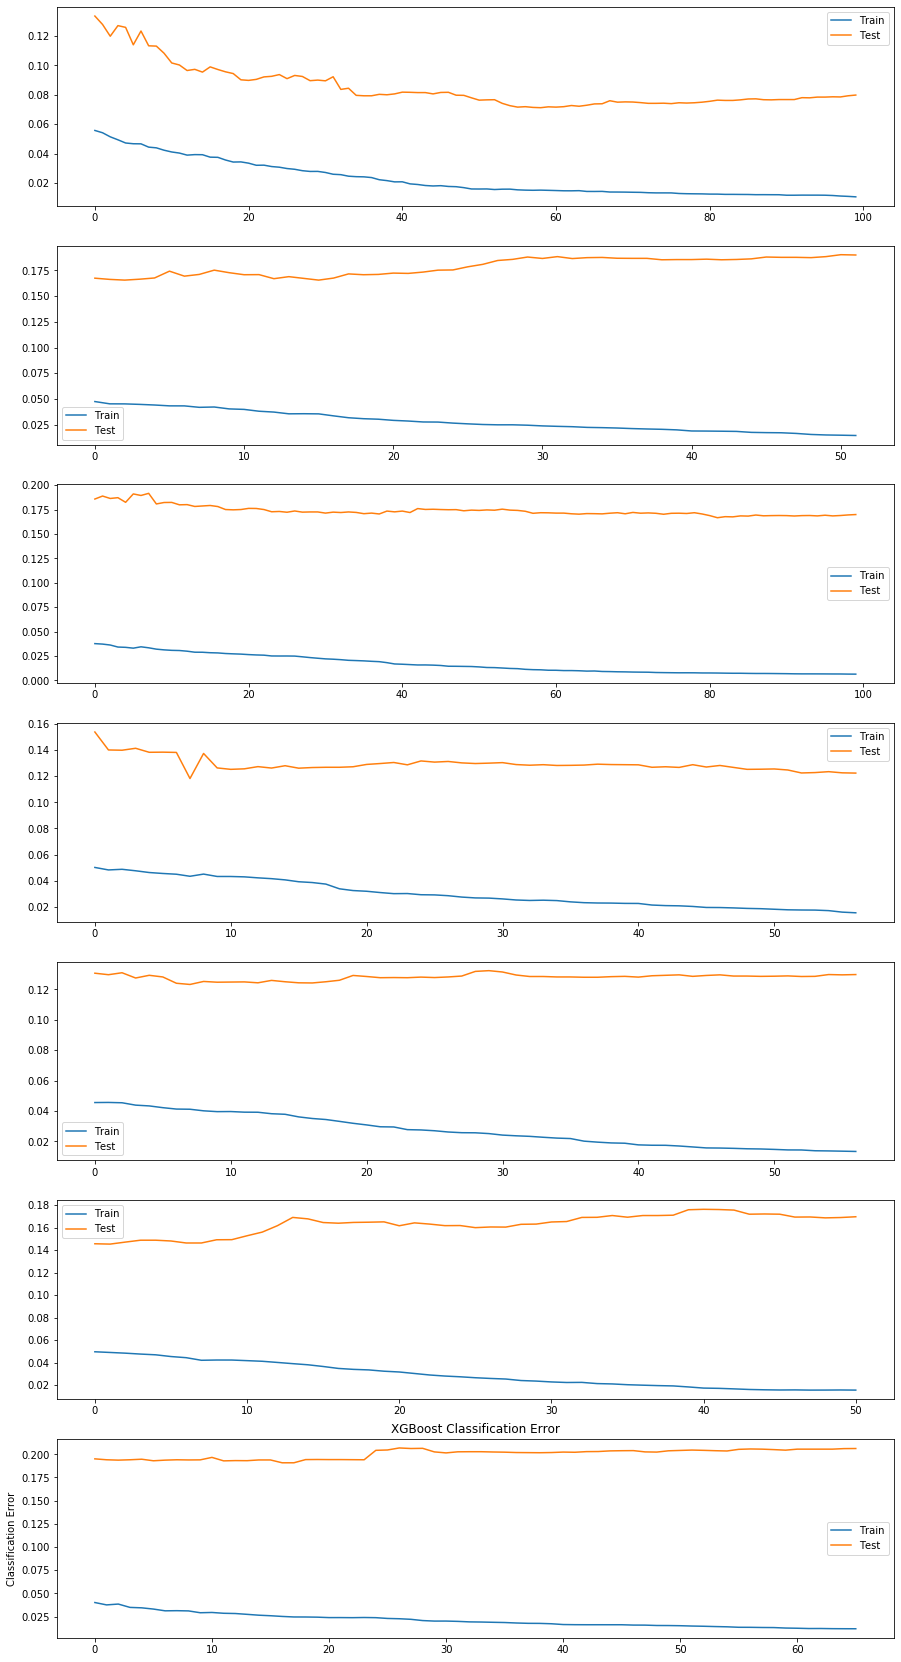

In [21]:
#subplot(nrows, ncols, index, **kwargs)
pyplot.figure(figsize=(15,30))

row_x=len(listresult)
col_x=2
idx=1
for i in range(1,row_x+1):
   results=listresult[i-1]
   epochs = len(results['validation_0']['error'])
   x_axis = range(0, epochs)

   pyplot.subplot(row_x,1,i)
   pyplot.plot(x_axis, results['validation_0']['error'], label='Train')
   pyplot.plot(x_axis, results['validation_1']['error'], label='Test')
   pyplot.legend()
    
 
   idx=idx+1

pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()